In [ ]:
import sys
sys.path.append("..\..")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from src.data.datasets.overlaps import OverlapsDataset

In [2]:
dataset = OverlapsDataset.from_path("..\\..\\datasets\\PlagiNet")

Extracting non-overlapping features: 100%|██████████| 760/760 [00:22<00:00, 33.13it/s]


In [3]:
classifier = LDA()

In [4]:
df = pd.DataFrame(
    np.concatenate([dataset.features, dataset.targets.reshape(-1, 1)], axis=1), 
    columns=dataset.feature_names + ['is_overlapping']
)
df

,levenshtein_distance,match_len1,match_len2,match_ratio1,match_ratio2,note_C,note_C♯,note_D,note_D♯,note_E,...,interval_6,interval_7,interval_8,interval_9,interval_10,interval_lt,interval_gt,interval_to_rest,interval_from_rest,is_overlapping
0,0.235290,-0.506027,-0.508394,-0.562391,-0.563156,-0.525179,-0.721058,-0.441421,-0.668382,-0.912110,...,-0.407332,0.014410,-0.397618,-0.271666,-0.328564,-0.473907,-0.365269,-1.004430,-1.004430,1.0
1,-1.185390,1.146240,0.846692,1.409168,0.263556,-0.914570,0.333407,-0.587439,-0.668382,-0.510787,...,-0.407332,0.991754,-0.397618,-0.271666,-0.328564,-0.473907,-0.365269,-0.347445,-0.347445,1.0
2,-1.181321,2.417214,0.969882,2.598739,2.565198,-0.135788,-0.325633,-1.025490,-0.136766,-0.611117,...,2.455000,-0.474263,1.869871,-0.271666,-0.328564,-0.473907,-0.365269,-1.332923,-1.332923,1.0
3,-1.176717,0.193009,3.864841,-0.083391,2.257328,3.238934,-0.193825,-0.295404,0.394850,-0.912110,...,-0.407332,-0.962935,-0.397618,-0.271666,-0.328564,2.436703,-0.365269,0.966527,0.966527,1.0
4,1.622277,-0.506027,-0.508394,-0.562391,-0.563156,1.681370,-0.721058,-0.295404,-0.668382,0.592852,...,-0.407332,0.991754,0.106268,4.295141,3.043544,-0.473907,2.416274,-1.332923,-1.332923,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,-0.032375,-0.506027,-0.508394,-0.562391,-0.563156,-0.525179,-0.721058,0.580699,-0.668382,-0.410456,...,-0.407332,-0.962935,-0.397618,-0.271666,-0.328564,-0.473907,-0.365269,-1.332923,-1.332923,0.0
776,-0.032375,-0.506027,-0.508394,-0.562391,-0.563156,-0.914570,-0.589250,-1.025490,-0.668382,-0.912110,...,-0.407332,-0.962935,-0.397618,-0.271666,-0.328564,-0.473907,-0.365269,-0.018952,-0.018952,0.0
777,-0.032375,-0.506027,-0.508394,-0.562391,-0.563156,-0.914570,-0.589250,-1.025490,-0.668382,-0.912110,...,-0.407332,-0.962935,-0.397618,-0.271666,-0.328564,-0.473907,-0.365269,-0.018952,-0.018952,0.0
778,-0.032375,-0.506027,-0.508394,-0.562391,-0.563156,-0.914570,0.201599,-1.025490,0.040439,-0.912110,...,-0.407332,-0.962935,-0.397618,-0.271666,-0.328564,-0.473907,-0.365269,-0.018952,-0.018952,0.0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(dataset.features, dataset.targets, test_size=0.2, random_state=42, stratify=dataset.targets)

In [6]:
classifier.fit(X_train, y_train)

LinearDiscriminantAnalysis()

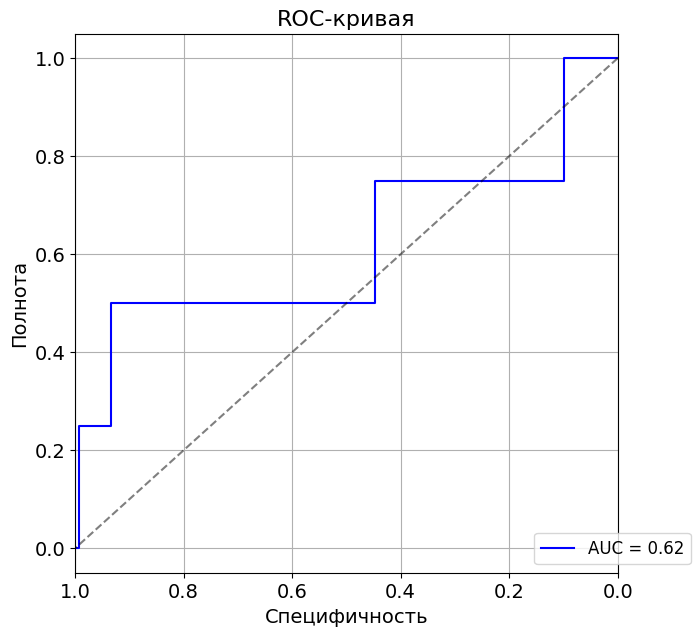

In [7]:
y_pred_proba = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 7))

plt.plot(1-fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0, 1], [1, 0], color="black", linestyle="--", alpha=0.5)
plt.xlabel("Специфичность", fontsize=14)
plt.ylabel("Полнота", fontsize=14)
plt.xlim((1, 0))
plt.legend(loc="lower right", bbox_to_anchor=(1.15, 0), fontsize=12)
plt.grid(True)
plt.title("ROC-кривая", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)